# Australian Energy Mix Analysis: Climate Change Implications

## Overview
This analysis examines Australia's National Electricity Market (NEM) fuel mix data from July 2025, focusing on the transition from fossil fuels to renewable energy sources. We investigate how different states are progressing in their renewable energy adoption and what this means for Australia's climate change mitigation efforts.

## Dataset Information
- **Source**: NEM Fuelmix Annual Data (July 2025)
- **Scope**: Australian National Electricity Market
- **Key Variables**: State, Date, Fuel Type, Energy Supply (MW)
- **Renewable Sources**: Battery, Biomass, Hydro, Solar, Wind
- **Non-Renewable Sources**: Black Coal, Brown Coal, Gas, Liquid Fuel, Other

The analysis provides critical insights into Australia's energy transition progress and its potential impact on carbon emissions reduction.

In [1]:
# import the necessary
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# load the dataset
raw_data = pd.read_csv('../data/nem_fuelmix_annual-data-july2025.csv')

# put in initial graphic or filtering
# categorise fuel types into renewa{'ble and non-renewable
data = raw_data.copy()
renewables = {'Battery', 'Biomass', 'Hydro', 'Solar', 'Wind'}
data['category'] = data['Fuel Type'].apply(lambda x: 'Renewable' if x in renewables else 'Non-Renewable')

# formalise all column names
data.columns = [col.strip().lower().replace(" ", "_") for col in data.columns]

# format the data
data['datetime'] = pd.to_datetime(data['datetime'], dayfirst=True)

# reorder columns for clarity
cols = ['state', 'datetime', 'fuel_type', 'category', 'supply']
data = data[cols]


FileNotFoundError: [Errno 2] No such file or directory: '../data/nem_fuelmix_annual-data-july2025.csv'

## Data Preparation and Methodology

### Data Loading and Initial Processing
The analysis begins with loading the NEM fuel mix dataset and implementing a critical categorization system that divides energy sources into renewable and non-renewable categories. This binary classification is essential for understanding Australia's progress toward clean energy targets.

### Key Preprocessing Steps:
1. **Fuel Type Categorization**: Energy sources are classified based on their environmental impact
2. **Column Standardization**: All column names are normalized for consistent analysis
3. **Date Formatting**: Datetime conversion ensures proper temporal analysis
4. **Data Structure Optimization**: Columns are reordered for logical flow

This preprocessing foundation enables robust comparative analysis between renewable and fossil fuel energy production across different Australian states.

In [3]:
data.info()
data.sample(3)
#data['fuel_type'].unique()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1612 entries, 0 to 1611
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   state      1612 non-null   object        
 1   datetime   1612 non-null   datetime64[ns]
 2   fuel_type  1612 non-null   object        
 3   category   1612 non-null   object        
 4   supply     1612 non-null   float64       
dtypes: datetime64[ns](1), float64(1), object(3)
memory usage: 63.1+ KB


,state,datetime,fuel_type,category,supply
1584,NSW,2025-07-19,Gas,Non-Renewable,15085.934
149,VIC,2024-08-24,Battery,Renewable,4243.537
86,TAS,2024-08-10,Wind,Renewable,28462.846


## New South Wales (NSW) Energy Transition Analysis

### Focus on Australia's Most Populous State
New South Wales, being Australia's most populous state and largest electricity consumer, serves as a critical case study for the nation's energy transition. The state's energy mix evolution directly impacts national carbon emissions and renewable energy targets.

### Analysis Approach:
- **Temporal Trend Analysis**: Examining how renewable vs. non-renewable energy supply has changed over time
- **Supply Aggregation**: Total energy supply (MW) aggregated by renewable category
- **Visual Representation**: Line plot showing the trajectory of both energy categories

Understanding NSW's energy transition patterns provides insights into the challenges and opportunities facing major metropolitan areas as they shift toward sustainable energy sources.

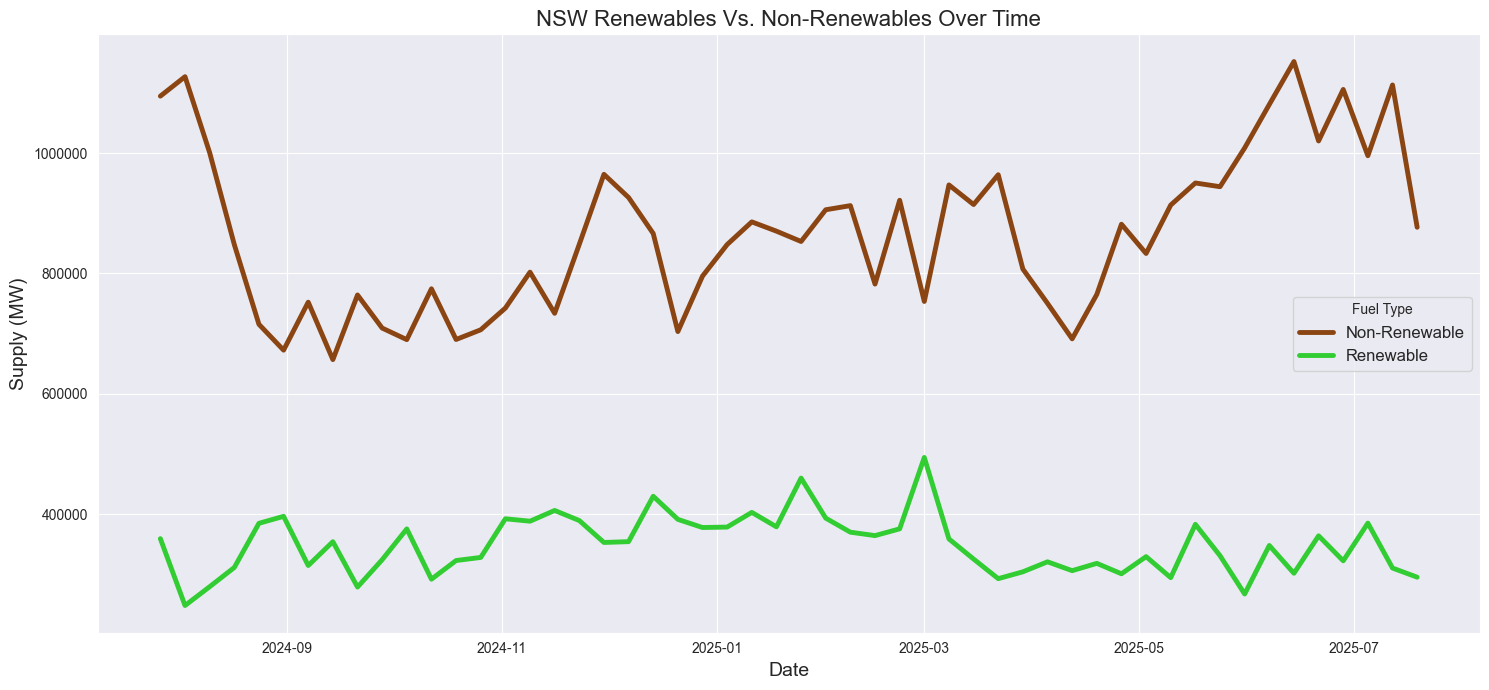

In [14]:
# build chart to fuel mix for nsw to show change over time
# refresh data
df = data.copy()

# filter for NSW and create pivot table for graphing
nsw = df[df['state'] == 'NSW']
nsw_pivot = nsw.pivot_table(index='datetime', columns='category', values='supply', aggfunc='sum').fillna(0)
                                                                                                          
# build plot
sns.set_style('darkgrid')
plt.figure(figsize=(15, 7))
palette = {'Renewable': 'limegreen', 'Non-Renewable': 'saddlebrown'}

# plot it
sns.lineplot(data=nsw_pivot, palette=palette, linewidth=3.5, dashes=False)

# finishing touches
plt.title('NSW Renewables Vs. Non-Renewables Over Time', fontsize=16)
plt.xlabel('Date', fontsize=14)
plt.ylabel('Supply (MW)', fontsize=14)
plt.ticklabel_format(style='plain', axis='y')
plt.legend(title='Fuel Type', fontsize=12)
plt.tight_layout()
plt.show()

## Detailed Fuel Mix Composition Analysis

### Granular Examination of Energy Sources
Moving beyond simple renewable vs. non-renewable categorization, this section provides a comprehensive breakdown of individual fuel types. This granular analysis is crucial for understanding the specific technologies driving Australia's energy transition.

### Advanced Visualization Strategy:
- **Stacked Area Plot**: Shows proportional contribution of each fuel type over time
- **Strategic Color Coding**: Bright colors for renewables (representing hope and growth) vs. dark colors for fossil fuels (representing legacy infrastructure)
- **Temporal Layering**: Visualizes how the energy mix composition changes chronologically

### Key Insights Expected:
- Identification of dominant renewable technologies (Solar, Wind, Hydro)
- Assessment of fossil fuel dependency patterns
- Recognition of emerging technologies (Battery storage, Biomass)

This detailed analysis enables policymakers and energy planners to make informed decisions about future infrastructure investments and regulatory frameworks.

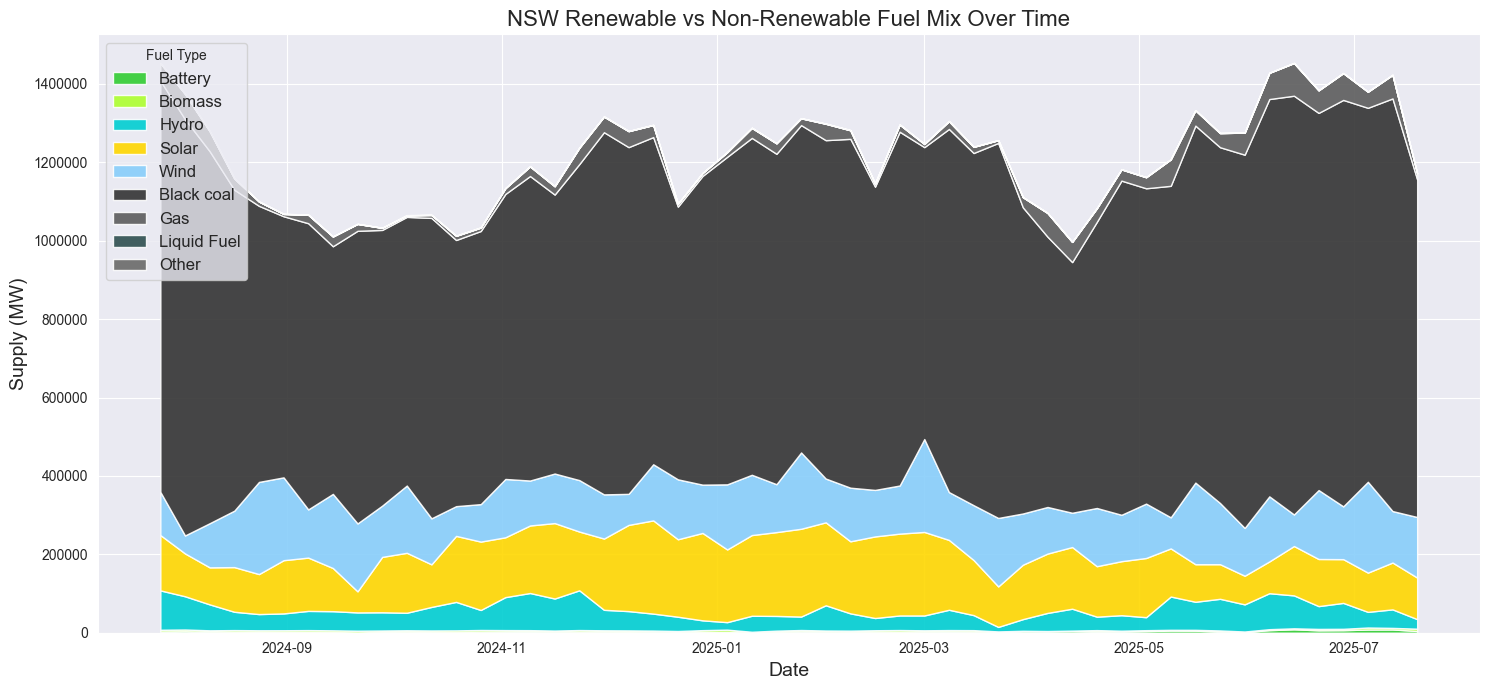

In [23]:
# Categorise fuel types
renewables = data[data['category'] == 'Renewable']['fuel_type'].unique().tolist()
non_renewables = data[data['category'] == 'Non-Renewable']['fuel_type'].unique().tolist()
fuel_order = renewables + non_renewables

# Custom color palette: bright for renewables, dark for non-renewables
color_map = {
    'Battery': '#32CD32',        # limegreen
    'Biomass': '#ADFF2F',        # greenyellow
    'Hydro': '#00CED1',          # darkturquoise
    'Solar': '#FFD700',          # gold
    'Wind': '#87CEFA',           # lightskyblue

    'Black coal': '#333333',     # dark gray
    'Brown coal': '#4B3621',     # dark brown
    'Gas': '#5C5C5C',            # steel gray
    'Liquid Fuel': '#2F4F4F',    # dark slate gray
    'Other': '#696969'           # dim gray
}

# Pivot NSW data by datetime and fuel type
pivot = nsw.pivot_table(index='datetime', columns='fuel_type', values='supply', aggfunc='sum')

# Reorder columns to show renewables first, non-renewables on top
pivot = pivot.fillna(0)[[col for col in fuel_order if col in pivot.columns]]

# Assign colors to each fuel type in order
colors = [color_map[fuel] for fuel in pivot.columns]

# Plot
sns.set_style('darkgrid')
plt.figure(figsize=(15, 7))

plt.stackplot(
    pivot.index,
    [pivot[col] for col in pivot.columns],
    labels=pivot.columns,
    colors=colors,
    alpha=0.9
)

# Final plot formatting
plt.title('NSW Renewable vs Non-Renewable Fuel Mix Over Time', fontsize=16)
plt.xlabel('Date', fontsize=14)
plt.ylabel('Supply (MW)', fontsize=14)
plt.ticklabel_format(style='plain', axis='y')
plt.legend(title='Fuel Type', fontsize=12, loc='upper left')
plt.tight_layout()
plt.show()


## Victoria (VIC) Energy Profile: Comparative State Analysis

### Interstate Energy Transition Comparison
Victoria presents a fascinating contrast to NSW, offering insights into how different states approach renewable energy adoption. Victoria's historically heavy reliance on brown coal makes its transition particularly significant for national emissions reduction.

### Comparative Analysis Framework:
- **State-Specific Challenges**: Victoria's brown coal legacy vs. NSW's black coal dependency
- **Renewable Adoption Patterns**: Different states may prioritize different renewable technologies
- **Infrastructure Transition**: How existing grid infrastructure influences renewable integration

### Climate Change Implications:
Victoria's energy transition is particularly critical given brown coal's high carbon intensity. Any shift toward renewables in Victoria represents substantial progress in Australia's climate commitments. This analysis will reveal whether Victoria is successfully diversifying its energy portfolio and reducing its carbon footprint.

The comparison between NSW and Victoria provides valuable insights into regional approaches to energy transition within Australia's federal system.

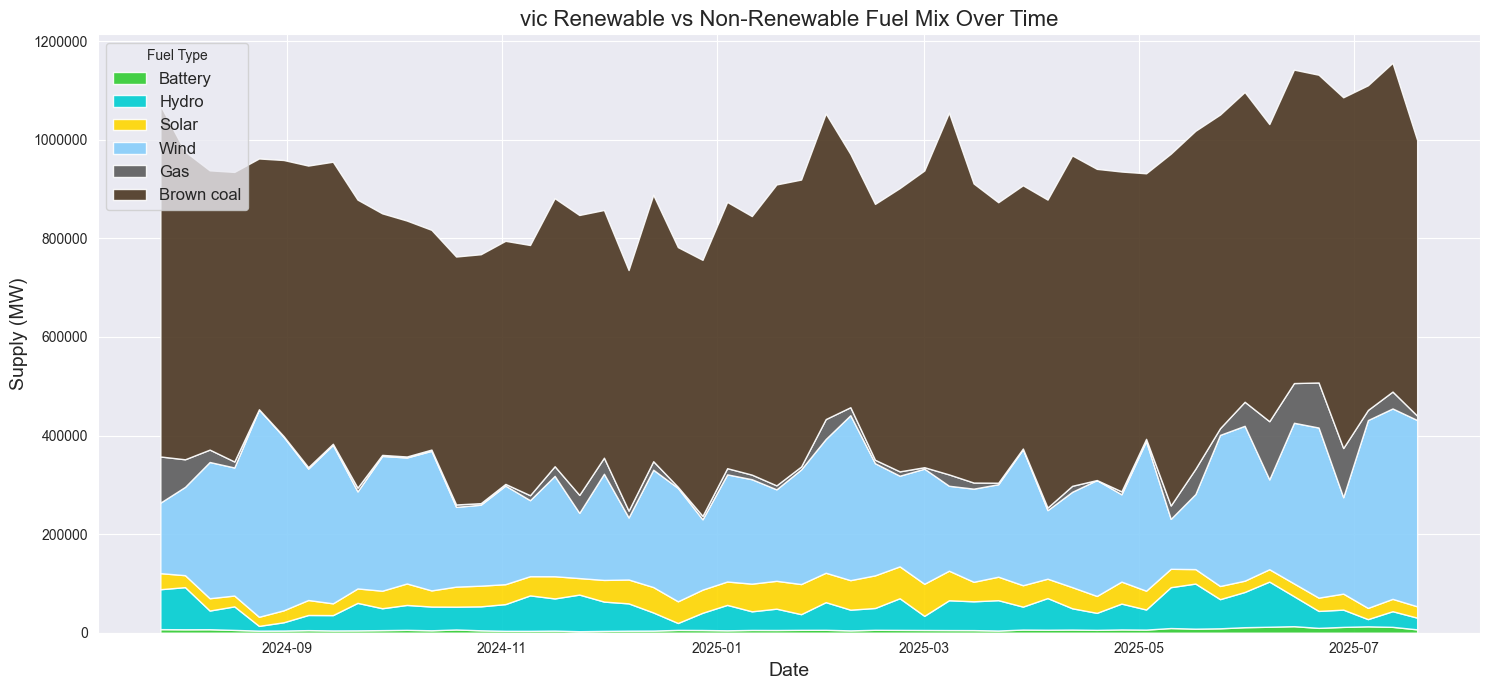

In [25]:
# refresh data
df = data.copy()

# filter for NSW and create pivot table for graphing
vic = df[df['state'] == 'VIC']
vic_pivot = vic.pivot_table(index='datetime', columns='category', values='supply', aggfunc='sum').fillna(0)


pivot = vic.pivot_table(index='datetime', columns='fuel_type', values='supply', aggfunc='sum')

# Reorder columns to show renewables first, non-renewables on top
pivot = pivot.fillna(0)[[col for col in fuel_order if col in pivot.columns]]

# Assign colors to each fuel type in order
colors = [color_map[fuel] for fuel in pivot.columns]

# Plot
sns.set_style('darkgrid')
plt.figure(figsize=(15, 7))

plt.stackplot(
    pivot.index,
    [pivot[col] for col in pivot.columns],
    labels=pivot.columns,
    colors=colors,
    alpha=0.9
)

# Final plot formatting
plt.title('vic Renewable vs Non-Renewable Fuel Mix Over Time', fontsize=16)
plt.xlabel('Date', fontsize=14)
plt.ylabel('Supply (MW)', fontsize=14)
plt.ticklabel_format(style='plain', axis='y')
plt.legend(title='Fuel Type', fontsize=12, loc='upper left')
plt.tight_layout()
plt.show()


## Conclusions and Future Research Opportunities

### Key Findings Summary
This analysis has provided crucial insights into Australia's energy transition progress through the lens of NSW and Victoria's electricity generation patterns. The data reveals important trends in renewable energy adoption and highlights the ongoing challenge of transitioning away from fossil fuel dependency.

### Climate Change Implications
The energy mix data directly correlates with Australia's carbon emissions profile and climate change mitigation efforts. States showing increased renewable penetration are contributing significantly to national emissions reduction targets, while those maintaining high fossil fuel dependency present ongoing challenges for climate policy implementation.

---

## Potential Future Analysis Directions

### 1. **Comprehensive Multi-State Comparison**
Expanding this analysis to include all Australian states and territories would provide a complete national picture. Queensland's unique energy profile with its significant coal resources, South Australia's wind energy leadership, and Tasmania's hydroelectric dominance would offer rich comparative insights. This comprehensive approach could reveal which states are leading the transition and which require additional policy intervention.

### 2. **Seasonal and Temporal Pattern Analysis**
Deep-dive temporal analysis could examine:
- **Seasonal variations** in renewable energy generation (particularly solar and wind)
- **Peak demand periods** and how they're met by different fuel types
- **Grid stability** during high renewable periods
- **Weather impact analysis** on renewable generation reliability
- **Daily and hourly patterns** to understand baseload vs. peak generation sources

### 3. **Economic Impact Assessment**
Integrating economic data could reveal:
- **Cost trends** of renewable vs. fossil fuel generation
- **Investment patterns** in renewable infrastructure
- **Employment impacts** of energy transition
- **Electricity pricing** relationships with renewable penetration
- **Grid infrastructure costs** associated with renewable integration

### 4. **Carbon Emissions Modeling**
Developing sophisticated carbon footprint analysis:
- **Real-time emissions calculations** based on fuel mix
- **Emissions intensity trends** over time
- **State-by-state carbon performance** rankings
- **Projection modeling** for future emissions under different scenarios
- **International comparison** with other developed nations' progress

### 5. **Technology-Specific Deep Dives**
Individual renewable technology analysis:
- **Solar capacity factors** and efficiency trends
- **Wind energy performance** across different regions
- **Battery storage integration** and grid stabilization roles
- **Hydroelectric optimization** and drought resilience
- **Emerging technologies** like green hydrogen production potential

### 6. **Policy Impact Evaluation**
Correlating energy data with policy interventions:
- **Renewable Energy Target (RET)** effectiveness measurement
- **State-specific policy** impact assessment
- **Carbon pricing mechanism** effects on fuel mix
- **Grid modernization** policy outcomes
- **International agreement compliance** tracking (Paris Agreement commitments)

### 7. **Predictive Modeling and Scenario Planning**
Advanced analytical approaches:
- **Machine learning models** for renewable generation forecasting
- **Scenario analysis** for different policy pathways
- **Energy security assessment** under various renewable penetration levels
- **Grid stability modeling** with high renewable integration
- **Climate change impact** on renewable resource availability

### 8. **Social and Environmental Justice Analysis**
Examining equitable transition aspects:
- **Community energy access** during the transition
- **Environmental justice** considerations for fossil fuel-dependent communities
- **Regional employment** transition from coal to renewables
- **Energy affordability** across different socioeconomic groups
- **Indigenous community** participation in renewable energy projects

### 9. **International Benchmarking Study**
Comparative analysis with global leaders:
- **Denmark's wind energy** integration strategies
- **Germany's energiewende** lessons learned
- **California's renewable** mandates and outcomes
- **Nordic countries'** hydroelectric optimization
- **Developing nations'** leapfrog renewable adoption

### 10. **Integrated Systems Analysis**
Holistic energy ecosystem examination:
- **Transportation electrification** impact on grid demand
- **Industrial process** decarbonization requirements
- **Residential energy efficiency** improvements
- **Smart grid technology** integration
- **Demand response programs** effectiveness

---

### Research Methodology Recommendations

Future analyses would benefit from:
- **Real-time data integration** for more current insights
- **Higher temporal resolution** (hourly/sub-hourly data)
- **Geographic granularity** down to regional/local levels
- **Multi-disciplinary collaboration** between energy engineers, economists, and climate scientists
- **Stakeholder engagement** with energy utilities, policymakers, and communities
- **Open data initiatives** to ensure transparency and reproducibility

### Conclusion
Australia's energy transition represents one of the most significant infrastructure and policy challenges of the 21st century. This analysis provides a foundation for understanding current progress, but the complexity of the energy system demands continuous, sophisticated analysis to guide evidence-based decision-making. The future research directions outlined above would contribute substantially to Australia's ability to meet its climate commitments while maintaining energy security and economic prosperity.

The stakes are high: successful energy transition could position Australia as a global leader in clean energy, while failure could result in stranded assets, missed economic opportunities, and inadequate climate action. Comprehensive, ongoing analysis will be essential for navigating this critical transition successfully.